In [1]:
#导入第三方库
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
#设置中文编码和负号的正常显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
# 1.使用工具读取"stu.txt"文件，并将其中“Stu_Name”字段设计成索引。(2分)
df = pd.read_csv('stu.txt',sep='\t',index_col='Stu_Name')
df

Unnamed: 0  Stu_Age        City  money
Stu_Name                                        
John               0       23  Xiang gang   4500
Alice              1       26     Beijing   6500
Bob                2       33    Hangzhou   5550
Jane               3       30      Daqing   7050
Mike               4       24     HaErbin   5205
Lisa               5       35      Berlin   6660
Tom                6       30     Wenquan   5300
Emma               7       36     Toronto   5800
Alex               8       26      Moscow   4900
Kate               9       21       Dubai   5805
Alices            10       45     Beijing   6500

In [19]:
# 2.新增一列数据"Yonns"，设计数据并把每个人的工资上调20%输出展示(3分 )
df['Yonns'] = df['money']*1.2
df

Unnamed: 0  Stu_Age        City  money age_range   Yonns
Stu_Name                                                          
John               0       23  Xiang gang   4500     20-30  5400.0
Alice              1       26     Beijing   6500     20-30  7800.0
Bob                2       33    Hangzhou   5550     30-60  6660.0
Jane               3       30      Daqing   7050     20-30  8460.0
Mike               4       24     HaErbin   5205     20-30  6246.0
Lisa               5       35      Berlin   6660     30-60  7992.0
Tom                6       30     Wenquan   5300     20-30  6360.0
Emma               7       36     Toronto   5800     30-60  6960.0
Alex               8       26      Moscow   4900     20-30  5880.0
Kate               9       21       Dubai   5805     20-30  6966.0
Alices            10       45     Beijing   6500     30-60  7800.0

In [18]:
# 3.自主设置字段类型，使用pandas算子按年龄段统计不同城市的money总金额。(5分)
bins = [0,20,30,60,np.inf]
# bins = [0,20,30,60,float('inf')]
labels = ['0-20','20-30','30-60','60以上']
df['age_range'] = pd.cut(df['Stu_Age'],bins=bins,labels=labels)
result = df.groupby(['age_range','City'])['money'].sum()
result

age_range  City      
0-20       Beijing          0
           Berlin           0
           Daqing           0
           Dubai            0
           HaErbin          0
           Hangzhou         0
           Moscow           0
           Toronto          0
           Wenquan          0
           Xiang gang       0
20-30      Beijing       6500
           Berlin           0
           Daqing        7050
           Dubai         5805
           HaErbin       5205
           Hangzhou         0
           Moscow        4900
           Toronto          0
           Wenquan       5300
           Xiang gang    4500
30-60      Beijing       6500
           Berlin        6660
           Daqing           0
           Dubai            0
           HaErbin          0
           Hangzhou      5550
           Moscow           0
           Toronto       5800
           Wenquan          0
           Xiang gang       0
60以上       Beijing          0
           Berlin           0
           Daqing 

In [29]:
# 4.使用pandas按城市统计不同年龄段money总金额，并使用pandas可视化API绘图(5分)
result = df.groupby(['City','age_range'])['money'].sum()
result = result.reset_index()

result

City age_range  money
0      Beijing      0-20      0
1      Beijing     20-30   6500
2      Beijing     30-60   6500
3      Beijing      60以上      0
4       Berlin      0-20      0
5       Berlin     20-30      0
6       Berlin     30-60   6660
7       Berlin      60以上      0
8       Daqing      0-20      0
9       Daqing     20-30   7050
10      Daqing     30-60      0
11      Daqing      60以上      0
12       Dubai      0-20      0
13       Dubai     20-30   5805
14       Dubai     30-60      0
15       Dubai      60以上      0
16     HaErbin      0-20      0
17     HaErbin     20-30   5205
18     HaErbin     30-60      0
19     HaErbin      60以上      0
20    Hangzhou      0-20      0
21    Hangzhou     20-30      0
22    Hangzhou     30-60   5550
23    Hangzhou      60以上      0
24      Moscow      0-20      0
25      Moscow     20-30   4900
26      Moscow     30-60      0
27      Moscow      60以上      0
28     Toronto      0-20      0
29     Toronto     20-30      0
30     Toronto     30-60   5800
31     Toronto      60以上      0
32     Wenquan      0-20      0
33     Wenquan     20-30   5300
34     Wenquan     30-60      0
35     Wenquan      60以上      0
36  Xiang gang      0-20      0
37  Xiang gang     20-30   4500
38  Xiang gang     30-60      0
39  Xiang gang      60以上      0

In [30]:
result = result.pivot_table(index='City',columns='age_range',values='money')
result

age_range   0-20  20-30  30-60  60以上
City                                
Beijing        0   6500   6500     0
Berlin         0      0   6660     0
Daqing         0   7050      0     0
Dubai          0   5805      0     0
HaErbin        0   5205      0     0
Hangzhou       0      0   5550     0
Moscow         0   4900      0     0
Toronto        0      0   5800     0
Wenquan        0   5300      0     0
Xiang gang     0   4500      0     0

<AxesSubplot:xlabel='City'>

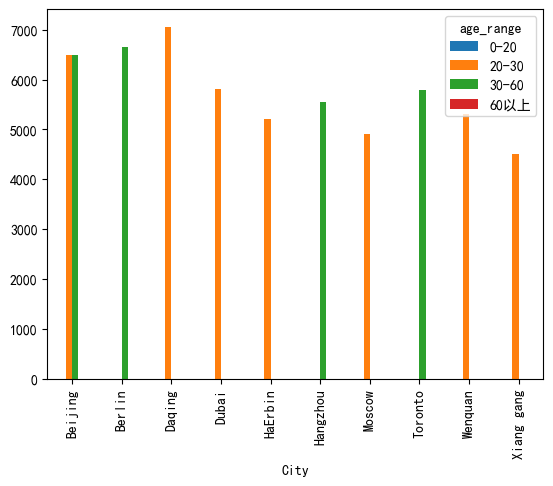

In [26]:
result.plot.bar()
# result.plot()